# Auto Regressive Models

## Imports

### Sys and Ipython

In [108]:
import sys
sys.path.insert(0, '../src/')

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Graphics

In [109]:
%matplotlib inline

import geopandas as gpd
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from __init__ import *

### Scikit-Learn

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Source files 

In [114]:
%load_ext autoreload

%autoreload 2

from appendix_figures import baseline_plot_results, plot_diff_along_time
from AR import AR
from Baseline import Baseline
from constant import data_matrix_15m_complete, dict_w, subway_stations
from metrics import *
from preprocessing import del_split_norm
from Regressor import Regressor
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [5]:
X_train, X_test, Xn_train, Xn_test, X_min_max = del_split_norm(
    dict_w, test_size=14, diff_days=7)

## Baseline Models

,None,s,j,sj
R2,0.073933,0.812240,0.105090,0.979675
RMSE,330.507187,148.820017,324.899829,48.964328
MSE,109235.000330,22147.397555,105559.898932,2397.505408
MAE,2.293077,0.571222,1.658139,0.205843
MAPE,229.307674,57.122188,165.813923,20.584344
MPE,-208.485230,-35.395104,-145.397994,-5.534067


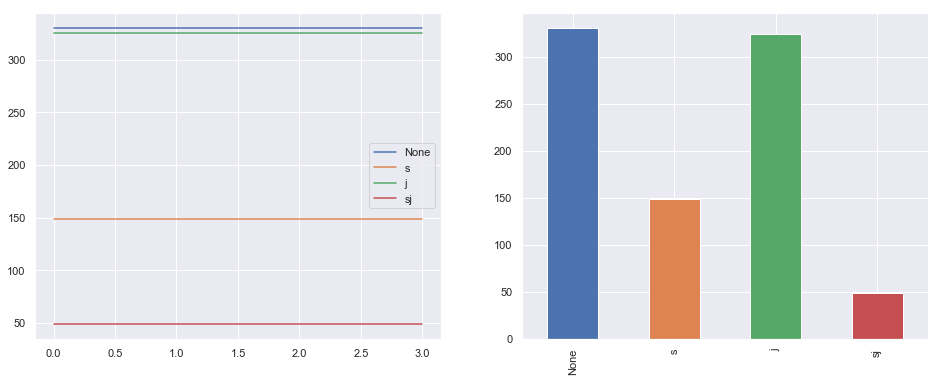

In [6]:
levels = ["None", "s", "j", "sj"]
df_baseline_scores, baseline_preds = baseline_plot_results(levels, X_train, X_test,
                                                           first_ndays=7)

In [115]:
linear_reg = LinearRegression(fit_intercept=True)
ar_model = AR(p=4, model=linear_reg)
ar_model.fit(X_train)
ar_preds = list(ar_model.forecast(X_test, tplus=3).values())
ar_scores = ar_model.score(X_test, ar_preds)

,t+1,t+2,t+3
R2,0.959119,0.915255,0.842585
RMSE,70.897857,102.077418,139.122025
MSE,5026.506193,10419.799287,19354.937842
MAE,0.378069,0.586507,0.818548
MAPE,37.806875,58.650666,81.854766
MPE,-23.285271,-41.850777,-63.608861


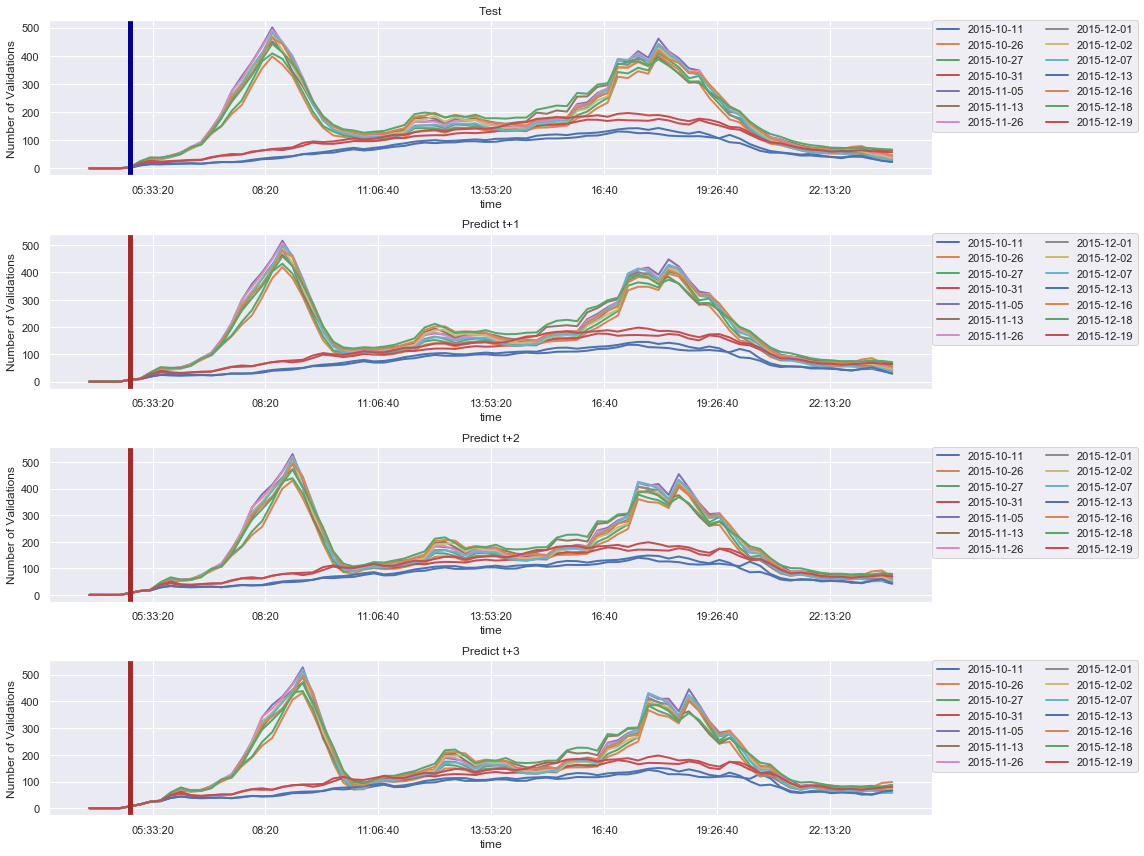

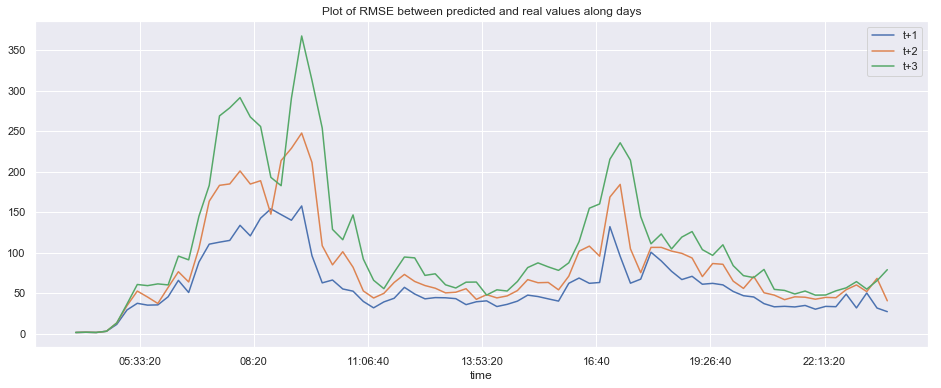

In [89]:
plot_qualitative_analysis(X_test, ar_preds, p=4)
plot_diff_along_time(X_test, ar_preds)